# Pagerank Algorithm

** “THE $25,000,000,000 EIGENVECTOR THE LINEAR ALGEBRA BEHIND GOOGLE” **

** Objective **

The objective is to estimate the popularity, or the importance, of a webpage, based on the interconnection of the web.

The rationale behind it is: 

* a page with more incoming links is more important than a page with less incoming links.

* a page with a link from a page which is known to be of high importance is also important.


In [120]:
import os
import pydot

In [121]:
# Simplified Page rank algorithm
graph = pydot.Dot(graph_type="digraph")
G = {
    'A' : ['B','D','C'],
    'B' : ['D'],
    'C' : ['A','D'],
    'D' : ['C','A']
}
# Adding nodes to the graph for pictorial representation
for g in G:
    graph.add_node(pydot.Node(g,style='filled',fillcolor='green'))
# Adding edges to the graph.
for g in G:
    for k in G[g]:
        graph.add_edge(pydot.Edge(g,k))

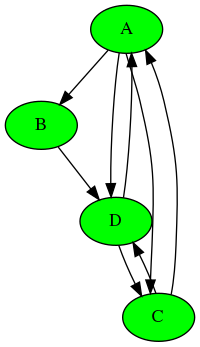

In [122]:
# web graph display
from IPython.display import Image, display
im = Image(graph.create_png())
display(im)

In [123]:
# link matrix
import numpy as np
print (G)
A = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
for key in G:
    N = len(G[key])
    for value in G[key]:
        j = ord(key) - ord('A')
        i = ord(value) - ord('A')
        A[i][j] = 1/N
print (np.array(A))

{'A': ['B', 'D', 'C'], 'B': ['D'], 'C': ['A', 'D'], 'D': ['C', 'A']}
[[0.         0.         0.5        0.5       ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.         0.         0.5       ]
 [0.33333333 1.         0.5        0.        ]]


In [124]:
from prettytable import PrettyTable
t = PrettyTable(['A','B','C','D'])
x = [[1],[1],[1],[1]]
x = np.array(x)
A = np.array(A)
max_iterations = 10
for _ in range(max_iterations):
    x = np.dot(A,x)
    t.add_row(x)
print (t)

+--------------+--------------+--------------+--------------+
|      A       |      B       |      C       |      D       |
+--------------+--------------+--------------+--------------+
|     [1.]     | [0.33333333] | [0.83333333] | [1.83333333] |
| [1.33333333] | [0.33333333] |    [1.25]    | [1.08333333] |
| [1.16666667] | [0.44444444] | [0.98611111] | [1.40277778] |
| [1.19444444] | [0.38888889] | [1.09027778] | [1.32638889] |
| [1.20833333] | [0.39814815] | [1.06134259] | [1.33217593] |
| [1.19675926] | [0.40277778] | [1.06886574] | [1.33159722] |
| [1.20023148] | [0.39891975] | [1.06471836] | [1.3361304]  |
| [1.20042438] | [0.40007716] | [1.06814236] | [1.3313561]  |
| [1.19974923] | [0.40014146] | [1.06581951] | [1.3342898]  |
| [1.20005466] | [0.39991641] | [1.06706131] | [1.33296762] |
+--------------+--------------+--------------+--------------+


In [125]:
# Ranking of Pages
rank = {
    'A' : x[0,0],
    'B' : x[1,0],
    'C' : x[2,0],
    'D' : x[3,0]
}
import operator
sorted_rank = sorted(rank.items(), key=operator.itemgetter(1),reverse=True)
print (sorted_rank)

[('D', 1.3329676247427982), ('A', 1.2000546553497942), ('C', 1.0670613104423867), ('B', 0.39991640946502055)]


We see that page D has the highest ranking.

**How to Handle Dangling Nodes**

A node is called a dangling node if it does not contain any out-going link, i.e., if the out-degree is zero.


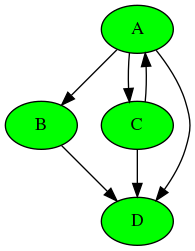

In [126]:
G.clear()
graph2 = pydot.Dot(graph_type="digraph")
G = {
    'A' : ['B','C','D'],
    'B' : ['D'],
    'C' : ['A','D'],
    'D' : []
}
# Adding nodes to the graph for pictorial representation
for g in G:
    graph2.add_node(pydot.Node(g,style='filled',fillcolor='green'))
# Adding edges to the graph.
for g in G:
    for k in G[g]:
        graph2.add_edge(pydot.Edge(g,k))
im = Image(graph2.create_png())
display(im)

In [127]:
# link matrix
import numpy as np
print (G)
A = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
for key in G:
    N = len(G[key])
    for value in G[key]:
        j = ord(key) - ord('A')
        i = ord(value) - ord('A')
        A[i][j] = 1/N
print (np.array(A))

{'A': ['B', 'C', 'D'], 'B': ['D'], 'C': ['A', 'D'], 'D': []}
[[0.         0.         0.5        0.        ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 1.         0.5        0.        ]]


In [128]:
t = PrettyTable(['A','B','C','D'])
x = [[1],[1],[1],[1]]
x = np.array(x)
A = np.array(A)
print (A)
max_iterations = 10
for _ in range(max_iterations):
    x = np.dot(A,x)
    t.add_row(x)
print (t)

[[0.         0.         0.5        0.        ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 1.         0.5        0.        ]]
+--------------+--------------+--------------+--------------+
|      A       |      B       |      C       |      D       |
+--------------+--------------+--------------+--------------+
|    [0.5]     | [0.33333333] | [0.33333333] | [1.83333333] |
| [0.16666667] | [0.16666667] | [0.16666667] | [0.66666667] |
| [0.08333333] | [0.05555556] | [0.05555556] | [0.30555556] |
| [0.02777778] | [0.02777778] | [0.02777778] | [0.11111111] |
| [0.01388889] | [0.00925926] | [0.00925926] | [0.05092593] |
| [0.00462963] | [0.00462963] | [0.00462963] | [0.01851852] |
| [0.00231481] | [0.00154321] | [0.00154321] | [0.00848765] |
| [0.0007716]  | [0.0007716]  | [0.0007716]  | [0.00308642] |
| [0.0003858]  | [0.0002572]  | [0.0002572]  | [0.00141461] |
| [0.0001286]  | [0.0001286]  | [0.0001286]  | [0.0005144]  |
+----

It can be clearly seen that, The pagerank vector will converge to zero ultimately.

One remedy is to modify the **Simplified Pagerank algorithm** by replacing any all-zero column by a column vector of value 1/N.

This adjustment is justified by modeling the behaviour of a web surfer, who after reading a page with no
out-going link, he/she will jump to a random page. He/she simply picks one of the N pages randomly with
equal probability

In [129]:
A[0][3] = A[1][3] = A[2][3] = A[3][3] = 1/4
print (A)

[[0.         0.         0.5        0.25      ]
 [0.33333333 0.         0.         0.25      ]
 [0.33333333 0.         0.         0.25      ]
 [0.33333333 1.         0.5        0.25      ]]


In [130]:
t = PrettyTable(['A','B','C','D'])
x = [[1],[1],[1],[1]]
x = np.array(x)
A = np.array(A)
max_iterations = 10
for _ in range(max_iterations):
    x = np.dot(A,x)
    t.add_row(x)
print (t)

+--------------+--------------+--------------+--------------+
|      A       |      B       |      C       |      D       |
+--------------+--------------+--------------+--------------+
|    [0.75]    | [0.58333333] | [0.58333333] | [2.08333333] |
|   [0.8125]   | [0.77083333] | [0.77083333] | [1.64583333] |
|  [0.796875]  | [0.68229167] | [0.68229167] | [1.83854167] |
| [0.80078125] | [0.72526042] | [0.72526042] | [1.74869792] |
| [0.79980469] | [0.70410156] | [0.70410156] | [1.79199219] |
| [0.80004883] | [0.71459961] | [0.71459961] | [1.77075195] |
| [0.79998779] | [0.70937093] | [0.70937093] | [1.78127035] |
| [0.80000305] | [0.71198018] | [0.71198018] | [1.77603658] |
| [0.79999924] | [0.71067683] | [0.71067683] | [1.7786471]  |
| [0.80000019] | [0.71132819] | [0.71132819] | [1.77734343] |
+--------------+--------------+--------------+--------------+


It can be clearly seen that, the values of the matrices are not converging to zero and We see that page D has the highest ranking.

# How to Handle Reducible web graph

When there are no dangling nodes, but once a surfer arrives certain pages and it just cannot get out of them then graph is called as reducible web graph.

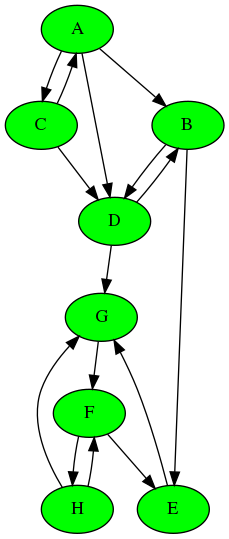

In [131]:
G.clear()
G = {
    'A' : ['B','C','D'],
    'B' : ['E','D'],
    'C' : ['A','D'],
    'D' : ['B','G'],
    'E' : ['G'],
    'F' : ['E','H'],
    'G' : ['F'],
    'H' : ['G','F']
}
graph3 = pydot.Dot(graph_type="digraph")
# Adding nodes to the graph for pictorial representation
for g in G:
    graph3.add_node(pydot.Node(g,style='filled',fillcolor='green'))
# Adding edges to the graph.
for g in G:
    for k in G[g]:
        graph3.add_edge(pydot.Edge(g,k))
im = Image(graph3.create_png())
display(im)

In [132]:
# link matrix
A = np.zeros([8,8])
for key in G:
    N = len(G[key])
    for value in G[key]:
        j = ord(key) - ord('A')
        i = ord(value) - ord('A')
        A[i][j] = 1/N

t = PrettyTable(['A','B','C','D','E','F','G','H'])
for i in range(8):
    t.add_row(A[i,:])
print (t)

+--------------------+-----+-----+-----+-----+-----+-----+-----+
|         A          |  B  |  C  |  D  |  E  |  F  |  G  |  H  |
+--------------------+-----+-----+-----+-----+-----+-----+-----+
|        0.0         | 0.0 | 0.5 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
| 0.3333333333333333 | 0.0 | 0.0 | 0.5 | 0.0 | 0.0 | 0.0 | 0.0 |
| 0.3333333333333333 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
| 0.3333333333333333 | 0.5 | 0.5 | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
|        0.0         | 0.5 | 0.0 | 0.0 | 0.0 | 0.5 | 0.0 | 0.0 |
|        0.0         | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 | 1.0 | 0.5 |
|        0.0         | 0.0 | 0.0 | 0.5 | 1.0 | 0.0 | 0.0 | 0.5 |
|        0.0         | 0.0 | 0.0 | 0.0 | 0.0 | 0.5 | 0.0 | 0.0 |
+--------------------+-----+-----+-----+-----+-----+-----+-----+


In [133]:
t = PrettyTable(['A','B','C','D','E','F','G','H'])
x = [[1],[1],[1],[1],[1],[1],[1],[1]]
x = np.array(x)
A = np.array(A)
max_iterations = 10
for _ in range(max_iterations):
    x = np.dot(A,x)
    t.add_row(x)
print (t)

+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|      A       |      B       |      C       |      D       |      E       |      F       |      G       |      H       |
+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|    [0.5]     | [0.83333333] | [0.33333333] | [1.33333333] |     [1.]     |    [1.5]     |     [2.]     |    [0.5]     |
| [0.16666667] | [0.83333333] | [0.16666667] |    [0.75]    | [1.16666667] |    [2.25]    | [1.91666667] |    [0.75]    |
| [0.08333333] | [0.43055556] | [0.05555556] | [0.55555556] | [1.54166667] | [2.29166667] | [1.91666667] |   [1.125]    |
| [0.02777778] | [0.30555556] | [0.02777778] | [0.27083333] | [1.36111111] | [2.47916667] | [2.38194444] | [1.14583333] |
| [0.01388889] | [0.14467593] | [0.00925926] | [0.17592593] | [1.39236111] | [2.95486111] | [2.06944444] | [1.23958333] |
| [0.00462963] | [0.0925

We can see that the ranking of pages A to D drop to zero eventually. But page D has three incoming links
and should have some nonzero importance.
In general, a graph is called **irreducible** if for any pair of distinct nodes, we can start from one of them, follow the links in the web graph and arrive at the other node, and vice versa. 

In [134]:
damping_factor = 0.85
M = damping_factor * A + (0.15/8) *np.ones([8,8])
print (M)

[[0.01875    0.01875    0.44375    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.30208333 0.01875    0.01875    0.44375    0.01875    0.01875
  0.01875    0.01875   ]
 [0.30208333 0.01875    0.01875    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.30208333 0.44375    0.44375    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.01875    0.44375    0.01875    0.01875    0.01875    0.44375
  0.01875    0.01875   ]
 [0.01875    0.01875    0.01875    0.01875    0.01875    0.01875
  0.86875    0.44375   ]
 [0.01875    0.01875    0.01875    0.44375    0.86875    0.01875
  0.01875    0.44375   ]
 [0.01875    0.01875    0.01875    0.01875    0.01875    0.44375
  0.01875    0.01875   ]]


In [135]:
t = PrettyTable(['A','B','C','D','E','F','G','H'])
x = [[0.125]]*8
print(x)
x = np.array(x)
M = np.array(M)
print (M)
max_iterations = 10
for _ in range(max_iterations):
    x = np.dot(M,x)
    t.add_row(x)
print (t)

[[0.125], [0.125], [0.125], [0.125], [0.125], [0.125], [0.125], [0.125]]
[[0.01875    0.01875    0.44375    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.30208333 0.01875    0.01875    0.44375    0.01875    0.01875
  0.01875    0.01875   ]
 [0.30208333 0.01875    0.01875    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.30208333 0.44375    0.44375    0.01875    0.01875    0.01875
  0.01875    0.01875   ]
 [0.01875    0.44375    0.01875    0.01875    0.01875    0.44375
  0.01875    0.01875   ]
 [0.01875    0.01875    0.01875    0.01875    0.01875    0.01875
  0.86875    0.44375   ]
 [0.01875    0.01875    0.01875    0.44375    0.86875    0.01875
  0.01875    0.44375   ]
 [0.01875    0.01875    0.01875    0.01875    0.01875    0.44375
  0.01875    0.01875   ]]
+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|      A       |      B       |      C       |      D       |      E       |      F 